In [1]:
import numpy as np # handling data structure
import pandas as pd
import matplotlib.pyplot as plt #handling the plot creation
import seaborn as sn #Handling the creation of graphs with data


In [2]:
heart_data = pd.read_csv("/kaggle/input/heartdata/heart (2).csv")


In [3]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


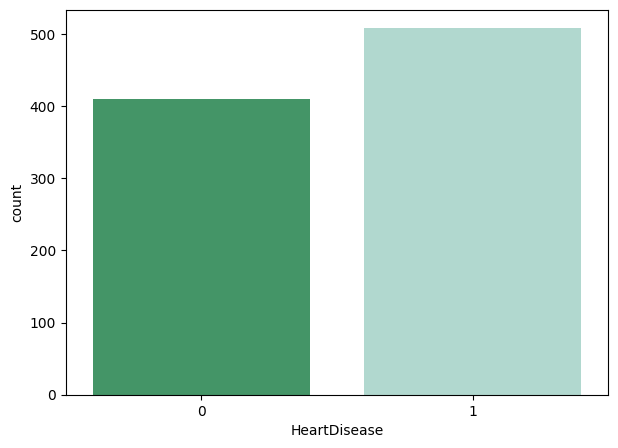

In [4]:
# counting no. of patients affected with heart disease
plt.figure(figsize=(7, 5))
sn.countplot(x='HeartDisease', data=heart_data,
             palette="BuGn_r")
plt.show()

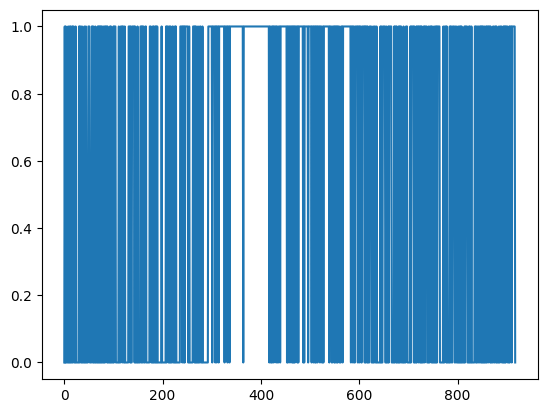

In [5]:
laste = heart_data['HeartDisease'].plot()
plt.show(laste)

In [6]:
target_value = heart_data["HeartDisease"]
disease_data = heart_data.drop(["HeartDisease"], axis = 1)

In [7]:
target_value

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [8]:
disease_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [9]:
disease_data.drop (['FastingBS','ExerciseAngina', 'Oldpeak', 'ST_Slope'], axis = 1, inplace = True)# removing unecessary data

In [10]:
disease_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR
0,40,M,ATA,140,289,Normal,172
1,49,F,NAP,160,180,Normal,156
2,37,M,ATA,130,283,ST,98
3,48,F,ASY,138,214,Normal,108
4,54,M,NAP,150,195,Normal,122
...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132
914,68,M,ASY,144,193,Normal,141
915,57,M,ASY,130,131,Normal,115
916,57,F,ATA,130,236,LVH,174


# **Converting Non-Numerical Values**

In [11]:
from sklearn.preprocessing import LabelEncoder

nan_converter = LabelEncoder()

disease_data["Sex"] = nan_converter.fit_transform(disease_data["Sex"])
disease_data["ChestPainType"] = nan_converter.fit_transform(disease_data["ChestPainType"])
disease_data["RestingECG"] = nan_converter.fit_transform(disease_data["RestingECG"])


In [12]:
disease_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR
0,40,1,1,140,289,1,172
1,49,0,2,160,180,1,156
2,37,1,1,130,283,2,98
3,48,0,0,138,214,1,108
4,54,1,2,150,195,1,122
...,...,...,...,...,...,...,...
913,45,1,3,110,264,1,132
914,68,1,0,144,193,1,141
915,57,1,0,130,131,1,115
916,57,0,1,130,236,0,174


# **Scaling the data**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
disease_data = scaler.fit_transform(disease_data )

# **Splitting the Data**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(disease_data, target_value, test_size=0.2, random_state=3)

# **Machine Learning Model**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
prediction = logistic_regression.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

0.782608695652174
